In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colormaps
import sys

sys.path.append("../../../../XRaySimulation")
from XRaySimulation import util, RockingCurve, Pulse

matplotlib.rcParams['font.family'] = ['serif']
matplotlib.rcParams['font.size'] = 12

In [2]:
## Load the water data
water_delays = np.concatenate((np.arange(0.0,0.5,0.05), np.arange(0.5,3.5,0.1), [9.376401551718187]))
water_data = np.load('./Water.npz',allow_pickle=True)

water_iso_q_lines_temp = water_data['iso_q_lines_temp']
water_Delta_I = water_data['Delta_I']

## Laod CO2 data
co2_delays = np.concatenate((np.arange(0.0,2.1,0.1), [2.9989, 3.9985, 4.99813, 5.9977, 9.996, 13.994]))
co2_data = np.load('./CO2.npz',allow_pickle=True)

co2_iso_q_lines_temp = co2_data['iso_q_lines']
co2_Delta_I = co2_data['averaged_q_by_delay'].item()

## Laod ethanol data
ethanol_delays = np.concatenate((np.arange(0.0,3.4,0.1),[3.9479659504512252,4.93,5.99,9.99,13.49]))
ethanol_data = np.load('./Ethanol.npz',allow_pickle=True)

ethanol_iso_q_lines_temp = ethanol_data['iso_q_lines']
ethanol_Delta_I = ethanol_data['averaged_q_by_delay'].item()

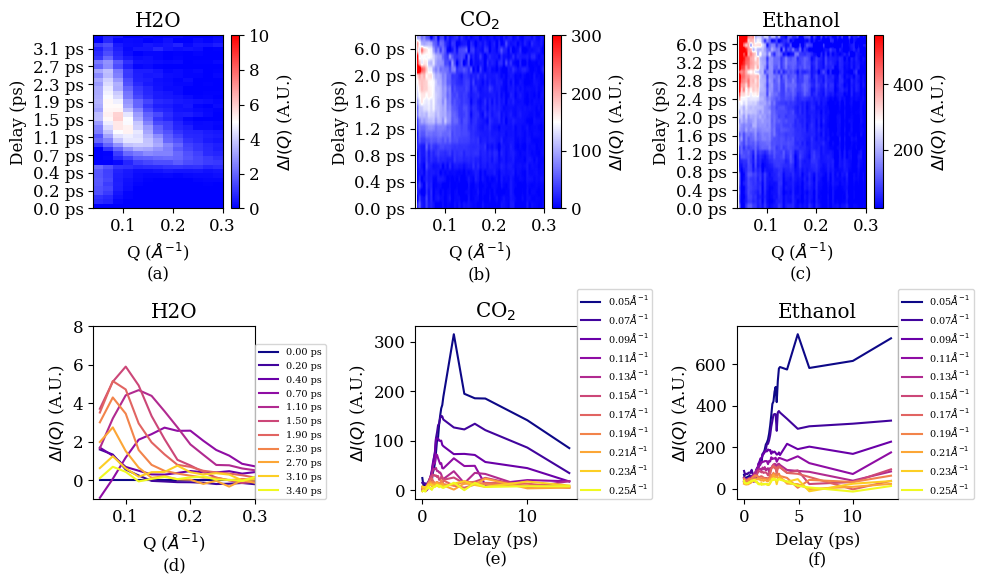

In [3]:

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10,6))
cmap = 'bwr'

# Show the 2D plot for water
delays = np.array(water_delays)
delays=delays[:-1]
intensity_values = water_Delta_I[:-1,1:]

img1 = axes[0,0].imshow(intensity_values,
                        aspect='auto', 
                        extent=[water_iso_q_lines_temp[0], water_iso_q_lines_temp[-1], 0, len(delays) - 1],
                        vmin=0,vmax=10,
                        cmap=cmap, 
                        origin='lower')

axes[0,0].set_yticks(list(range(len(delays))[::4]), labels=['{:.1f} ps'.format(val) for val in delays[::4]])
axes[0,0].set_xlabel(r'Q ($\AA^{-1}$)'+"\n(a)")
axes[0,0].set_ylabel('Delay (ps)')
axes[0,0].set_xlim([0.04, 0.3])
axes[0,0].set_title('H2O')
fig.colorbar(img1, ax=axes[0,0], label=r'$\Delta I(Q)$ (A.U.)')


# Show the 2D plot for co2
iso_q_lines_temp = np.array(co2_iso_q_lines_temp[:-1])  # convert to numpy array if not already
delays = np.array(co2_delays)
intensity_values = np.array([co2_Delta_I[delay][:len(iso_q_lines_temp)] for delay in delays])

img2 = axes[0,1].imshow(intensity_values, 
                        aspect='auto', 
                        extent=[co2_iso_q_lines_temp[0], iso_q_lines_temp[-1], 0, len(delays) - 1],
                        vmax=300,
                        vmin=0,
                        cmap=cmap, 
                        origin='lower')

axes[0,1].set_yticks(list(range(len(delays))[::4]), labels=['{:.1f} ps'.format(val) for val in delays[::4]])
axes[0,1].set_xlabel(r'Q ($\AA^{-1}$)'+"\n(b)")
axes[0,1].set_ylabel('Delay (ps)')
axes[0,1].set_xlim([0.04, 0.3])
axes[0,1].set_title('CO$_2$')
fig.colorbar(img2, ax=axes[0,1], label=r'$\Delta I(Q)$ (A.U.)')


# Show the 2D plot for ethanol
iso_q_lines_temp = np.array(ethanol_iso_q_lines_temp[:-1])  # convert to numpy array if not already
delays = np.array(ethanol_delays)
intensity_values = np.array([ethanol_Delta_I[delay][:len(iso_q_lines_temp)] for delay in delays])

img3 = axes[0,2].imshow(intensity_values, 
                        aspect='auto', 
                        extent=[ethanol_iso_q_lines_temp[0], iso_q_lines_temp[-1], 0, len(delays) - 1],
                        vmax=550,
                        vmin=20,
                        cmap=cmap, 
                        origin='lower')

axes[0,2].set_yticks(list(range(len(delays))[::4]), labels=['{:.1f} ps'.format(val) for val in delays[::4]])
axes[0,2].set_xlabel(r'Q ($\AA^{-1}$)'+"\n(c)")
axes[0,2].set_ylabel('Delay (ps)')
axes[0,2].set_xlim([0.04, 0.3])
axes[0,2].set_title('Ethanol')
fig.colorbar(img3, ax=axes[0,2], label=r'$\Delta I(Q)$ (A.U.)')

# Show the 1D data for water
colors = plt.cm.plasma(np.linspace(0,1,11))
interdelay=[0,4,8,12,16,20,24,28,32,36,39]
target_delayss=water_delays[interdelay]

for i, delay in enumerate(target_delayss):
    axes[1,0].plot(water_iso_q_lines_temp[3:],
                   water_Delta_I[interdelay[i], 3:],
                   label='{:.2f} ps'.format(delay), 
                   color=colors[i])
    
axes[1,0].set_xlabel(r'Q ($\AA^{-1}$)'+"\n(d)")
axes[1,0].set_ylabel(r'$\Delta I(Q)$ (A.U.)')
axes[1,0].legend(loc=(1,0), fontsize=7)
axes[1,0].set_xlim([0.05,0.3])
axes[1,0].set_ylim([-1,8])
axes[1,0].set_title('H2O')

# Show the 1D data for co2
iso_q_lines_temp = np.array(co2_iso_q_lines_temp[:-1])  # convert to numpy array if not already
delays = np.array(co2_delays)
intensity_values = np.array([co2_Delta_I[delay] for delay in delays])
q_ranges = [0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26]
colors = plt.cm.plasma(np.linspace(0,1,len(q_ranges) - 1))

for i in range(len(q_ranges) - 1):
    q_min = q_ranges[i]
    q_max = q_ranges[i + 1]
    q_indices = np.where((iso_q_lines_temp >= q_min) & (iso_q_lines_temp <= q_max))[0]
    if len(q_indices) > 0:
        average_intensity = np.mean(intensity_values[:, q_indices], axis=1)
        axes[1,1].plot(delays, average_intensity, 
                       label="{:.2f}".format((q_max + q_min) /2 )+"$\AA^{-1}$",
                       c = colors[i])
                       #label=f'{q_min} ≤ Q ≤ {q_max} $\AA^{-1}$')

axes[1,1].set_xlabel('Delay (ps)\n(e)')
axes[1,1].set_ylabel(r'$\Delta I(Q)$ (A.U.)')
axes[1,1].set_title('CO$_2$')
axes[1,1].legend(loc=(1,0), fontsize=7)


# Show the 1D data for ethonal
iso_q_lines_temp = np.array(ethanol_iso_q_lines_temp[:-1])  # convert to numpy array if not already
delays = np.array(ethanol_delays)
intensity_values = np.array([ethanol_Delta_I[delay] for delay in delays])
q_ranges = [0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26]
colors = plt.cm.plasma(np.linspace(0,1,len(q_ranges) - 1))

for i in range(len(q_ranges) - 1):
    q_min = q_ranges[i]
    q_max = q_ranges[i + 1]
    q_indices = np.where((iso_q_lines_temp >= q_min) & (iso_q_lines_temp <= q_max))[0]
    if len(q_indices) > 0:
        average_intensity = np.mean(intensity_values[:, q_indices], axis=1)
        axes[1,2].plot(delays, average_intensity, 
                       label="{:.2f}".format((q_max + q_min) /2 )+"$\AA^{-1}$",
                       c = colors[i])
                       #label=f'{q_min} ≤ Q ≤ {q_max} $\AA^{-1}$')

axes[1,2].set_xlabel('Delay (ps)\n(f)')
axes[1,2].set_ylabel(r'$\Delta I(Q)$ (A.U.)')
axes[1,2].set_title('Ethanol')
axes[1,2].legend(loc=(1,0), fontsize=7)

plt.tight_layout()
#plt.savefig("./all_data.png", dpi=300, bbox_inches='tight')
plt.show()


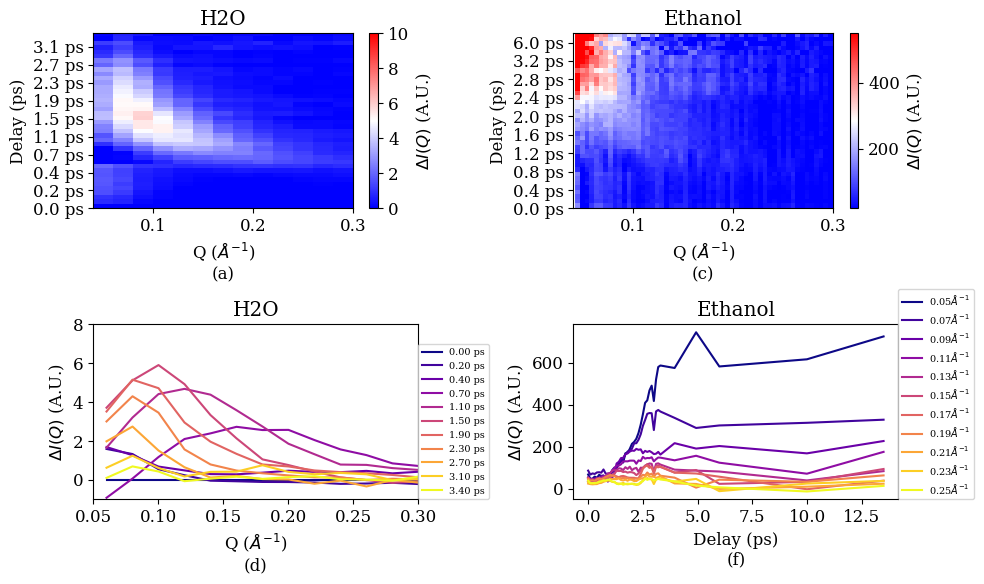

In [5]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,6))
cmap = 'bwr'

# Show the 2D plot for water
delays = np.array(water_delays)
delays=delays[:-1]
intensity_values = water_Delta_I[:-1,1:]

img1 = axes[0,0].imshow(intensity_values,
                        aspect='auto', 
                        extent=[water_iso_q_lines_temp[0], water_iso_q_lines_temp[-1], 0, len(delays) - 1],
                        vmin=0,vmax=10,
                        cmap=cmap, 
                        origin='lower')

axes[0,0].set_yticks(list(range(len(delays))[::4]), labels=['{:.1f} ps'.format(val) for val in delays[::4]])
axes[0,0].set_xlabel(r'Q ($\AA^{-1}$)'+"\n(a)")
axes[0,0].set_ylabel('Delay (ps)')
axes[0,0].set_xlim([0.04, 0.3])
axes[0,0].set_title('H2O')
fig.colorbar(img1, ax=axes[0,0], label=r'$\Delta I(Q)$ (A.U.)')


# Show the 2D plot for ethanol
iso_q_lines_temp = np.array(ethanol_iso_q_lines_temp[:-1])  # convert to numpy array if not already
delays = np.array(ethanol_delays)
intensity_values = np.array([ethanol_Delta_I[delay][:len(iso_q_lines_temp)] for delay in delays])

img3 = axes[0,1].imshow(intensity_values, 
                        aspect='auto', 
                        extent=[ethanol_iso_q_lines_temp[0], iso_q_lines_temp[-1], 0, len(delays) - 1],
                        vmax=550,
                        vmin=20,
                        cmap=cmap, 
                        origin='lower')

axes[0,1].set_yticks(list(range(len(delays))[::4]), labels=['{:.1f} ps'.format(val) for val in delays[::4]])
axes[0,1].set_xlabel(r'Q ($\AA^{-1}$)'+"\n(c)")
axes[0,1].set_ylabel('Delay (ps)')
axes[0,1].set_xlim([0.04, 0.3])
axes[0,1].set_title('Ethanol')
fig.colorbar(img3, ax=axes[0,1], label=r'$\Delta I(Q)$ (A.U.)')

# Show the 1D data for water
colors = plt.cm.plasma(np.linspace(0,1,11))
interdelay=[0,4,8,12,16,20,24,28,32,36,39]
target_delayss=water_delays[interdelay]

for i, delay in enumerate(target_delayss):
    axes[1,0].plot(water_iso_q_lines_temp[3:],
                   water_Delta_I[interdelay[i], 3:],
                   label='{:.2f} ps'.format(delay), 
                   color=colors[i])
    
axes[1,0].set_xlabel(r'Q ($\AA^{-1}$)'+"\n(d)")
axes[1,0].set_ylabel(r'$\Delta I(Q)$ (A.U.)')
axes[1,0].legend(loc=(1,0), fontsize=7)
axes[1,0].set_xlim([0.05,0.3])
axes[1,0].set_ylim([-1,8])
axes[1,0].set_title('H2O')

# Show the 1D data for ethonal
iso_q_lines_temp = np.array(ethanol_iso_q_lines_temp[:-1])  # convert to numpy array if not already
delays = np.array(ethanol_delays)
intensity_values = np.array([ethanol_Delta_I[delay] for delay in delays])
q_ranges = [0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26]
colors = plt.cm.plasma(np.linspace(0,1,len(q_ranges) - 1))

for i in range(len(q_ranges) - 1):
    q_min = q_ranges[i]
    q_max = q_ranges[i + 1]
    q_indices = np.where((iso_q_lines_temp >= q_min) & (iso_q_lines_temp <= q_max))[0]
    if len(q_indices) > 0:
        average_intensity = np.mean(intensity_values[:, q_indices], axis=1)
        axes[1,1].plot(delays, average_intensity, 
                       label="{:.2f}".format((q_max + q_min) /2 )+"$\AA^{-1}$",
                       c = colors[i])
                       #label=f'{q_min} ≤ Q ≤ {q_max} $\AA^{-1}$')

axes[1,1].set_xlabel('Delay (ps)\n(f)')
axes[1,1].set_ylabel(r'$\Delta I(Q)$ (A.U.)')
axes[1,1].set_title('Ethanol')
axes[1,1].legend(loc=(1,0), fontsize=7)

plt.tight_layout()
#plt.savefig("./all_data.png", dpi=300, bbox_inches='tight')
plt.show()


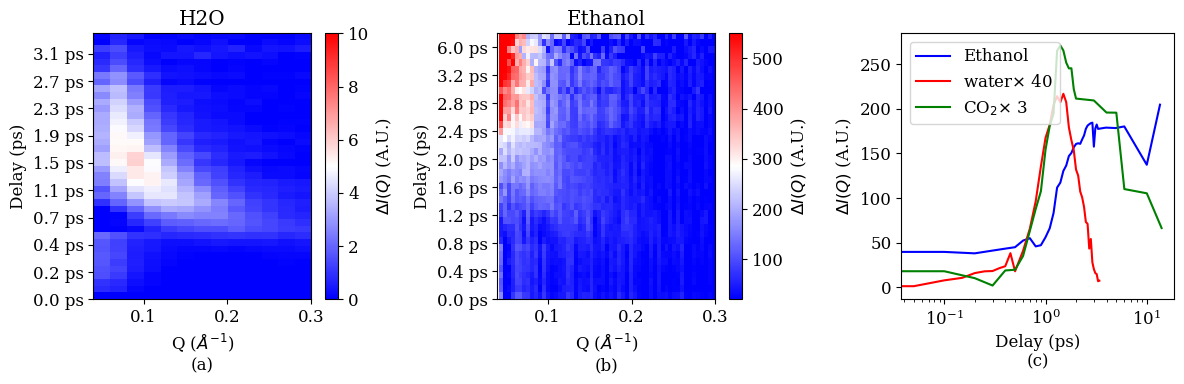

In [30]:

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12,4))
cmap = 'bwr'

# Show the 2D plot for water
delays = np.array(water_delays)
delays=delays[:-1]
intensity_values = water_Delta_I[:-1,1:]

img1 = axes[0].imshow(intensity_values,
                        aspect='auto', 
                        extent=[water_iso_q_lines_temp[0], water_iso_q_lines_temp[-1], 0, len(delays) - 1],
                        vmin=0,vmax=10,
                        cmap=cmap, 
                        origin='lower')

axes[0].set_yticks(list(range(len(delays))[::4]), labels=['{:.1f} ps'.format(val) for val in delays[::4]])
axes[0].set_xlabel(r'Q ($\AA^{-1}$)'+"\n(a)")
axes[0].set_ylabel('Delay (ps)')
axes[0].set_xlim([0.04, 0.3])
axes[0].set_title('H2O')
fig.colorbar(img1, ax=axes[0], label=r'$\Delta I(Q)$ (A.U.)')


# Show the 2D plot for ethanol
iso_q_lines_temp = np.array(ethanol_iso_q_lines_temp[:-1])  # convert to numpy array if not already
delays = np.array(ethanol_delays)
intensity_values = np.array([ethanol_Delta_I[delay][:len(iso_q_lines_temp)] for delay in delays])

img3 = axes[1].imshow(intensity_values, 
                        aspect='auto', 
                        extent=[ethanol_iso_q_lines_temp[0], iso_q_lines_temp[-1], 0, len(delays) - 1],
                        vmax=550,
                        vmin=20,
                        cmap=cmap, 
                        origin='lower')

axes[1].set_yticks(list(range(len(delays))[::4]), labels=['{:.1f} ps'.format(val) for val in delays[::4]])
axes[1].set_xlabel(r'Q ($\AA^{-1}$)'+"\n(b)")
axes[1].set_ylabel('Delay (ps)')
axes[1].set_xlim([0.04, 0.3])
axes[1].set_title('Ethanol')
fig.colorbar(img3, ax=axes[1], label=r'$\Delta I(Q)$ (A.U.)')

# Show the 1D data for ethonal
iso_q_lines_temp = np.array(ethanol_iso_q_lines_temp[:-1])  # convert to numpy array if not already
delays = np.array(ethanol_delays)
intensity_values = np.array([ethanol_Delta_I[delay][:len(iso_q_lines_temp)] for delay in delays])
q_idx_1 = np.argmin(np.abs(ethanol_iso_q_lines_temp - 0.08)) 
q_idx_2 = np.argmin(np.abs(ethanol_iso_q_lines_temp - 0.12)) 
s_q_t =  np.mean(intensity_values[:, q_idx_1:q_idx_2], axis=-1)
axes[2].semilogx(delays, s_q_t, c='b', label='Ethanol')

iso_q_lines_temp = np.copy(water_iso_q_lines_temp)
delays = np.array(water_delays)
delays=delays[:-1]
intensity_values = water_Delta_I[:-1,1:]
q_idx_1 = np.argmin(np.abs(water_iso_q_lines_temp - 0.08)) 
q_idx_2 = np.argmin(np.abs(water_iso_q_lines_temp - 0.12)) 
s_q_t =  np.mean(intensity_values[:, q_idx_1:q_idx_2], axis=-1)
axes[2].semilogx(delays, s_q_t * 40, c='r', label='water'+r'$\times$ 40')

iso_q_lines_temp = np.array(co2_iso_q_lines_temp[:-1])  # convert to numpy array if not already
delays = np.array(co2_delays)
intensity_values = np.array([co2_Delta_I[delay][:len(iso_q_lines_temp)] for delay in delays])
q_idx_1 = np.argmin(np.abs(iso_q_lines_temp - 0.08)) 
q_idx_2 = np.argmin(np.abs(iso_q_lines_temp - 0.12)) 
s_q_t =  np.mean(intensity_values[:, q_idx_1:q_idx_2], axis=-1)
axes[2].semilogx(delays, s_q_t * 3, c='g', label='CO$_2$'+r'$\times$ 3')
axes[2].set_xlabel('Delay (ps)\n(c)')
axes[2].set_ylabel(r'$\Delta I(Q)$ (A.U.)')
#axes[2].set_title('Ethanol')
axes[2].legend()

plt.tight_layout()
plt.savefig("./all_data.png", dpi=300, bbox_inches='tight')
plt.show()
